In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

dates = pd.date_range(start="2023-01-01", end="2024-12-31", freq="W")

platforms = ["Amazon KDP", "Barnes & Noble", "IngramSpark"]
formats = ["Ebook", "Paperback", "Audiobook"]
marketing_channels = ["Ads", "Email", "Social Media", "Organic"]

data = []

for date in dates:
    for platform in platforms:
        for book_id in range(1, 6):  # 5 Horror books
            units_sold = np.random.poisson(lam=20)
            price = np.random.choice([2.99, 4.99, 9.99, 14.99])
            revenue = units_sold * price
            platform_fee = revenue * np.random.choice([0.30, 0.40])
            royalties = revenue - platform_fee
            sales_rank = np.random.randint(500, 50000)
            page_views = np.random.randint(200, 3000)
            ratings = np.random.randint(0, 5)
            avg_rating = round(np.random.uniform(3.0, 4.8), 2)
            
            data.append([
                date, f"Horror Book {book_id}", platform,
                np.random.choice(formats),
                units_sold, price, revenue,
                royalties, sales_rank,
                page_views,
                np.random.choice(marketing_channels),
                ratings, avg_rating
            ])

columns = [
    "Date", "Book Title", "Platform", "Format",
    "Units Sold", "Unit Price", "Revenue",
    "Royalties", "Sales Rank",
    "Page Views", "Marketing Channel",
    "New Ratings", "Avg Rating"
]

df = pd.DataFrame(data, columns=columns)
df.head()


,Date,Book Title,Platform,Format,Units Sold,Unit Price,Revenue,Royalties,Sales Rank,Page Views,Marketing Channel,New Ratings,Avg Rating
0,2023-01-01,Horror Book 1,Amazon KDP,Ebook,23,9.99,229.77,137.862,17350,1438,Organic,2,3.83
1,2023-01-01,Horror Book 2,Amazon KDP,Paperback,14,2.99,41.86,25.116,2933,1415,Email,3,3.33
2,2023-01-01,Horror Book 3,Amazon KDP,Ebook,20,14.99,299.80,179.880,3247,1175,Social Media,2,3.69
3,2023-01-01,Horror Book 4,Amazon KDP,Ebook,19,2.99,56.81,34.086,43521,441,Email,1,3.55
4,2023-01-01,Horror Book 5,Amazon KDP,Paperback,22,9.99,219.78,131.868,17659,234,Email,0,3.47


In [2]:
df.groupby("Book Title")[["Units Sold", "Revenue"]].sum().sort_values("Revenue", ascending=False)


,Units Sold,Revenue
Book Title,,
Horror Book 2,6296,55406.04
Horror Book 3,6246,54843.54
Horror Book 5,6300,53355.00
Horror Book 4,6205,52645.95
Horror Book 1,6396,50644.04


In [3]:
df.groupby("Platform")["Royalties"].sum()


Platform
Amazon KDP        56378.847
Barnes & Noble    58845.657
IngramSpark       58396.288
Name: Royalties, dtype: float64

<Axes: title={'center': 'Average Sales Rank Trend (4-week rolling)'}, xlabel='Date'>

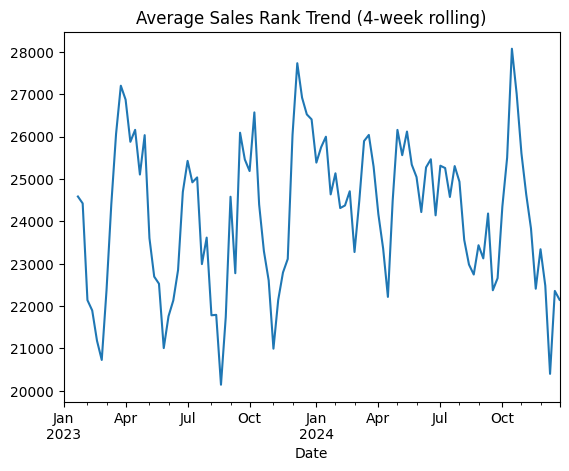

In [4]:
df.groupby("Date")["Sales Rank"].mean().rolling(4).mean().plot(
    title="Average Sales Rank Trend (4-week rolling)"
)


<Axes: title={'center': 'Horror Book Sales Seasonality'}, xlabel='Month'>

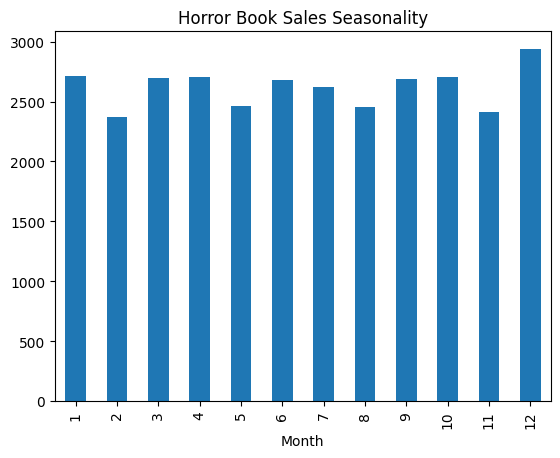

In [5]:
df["Month"] = df["Date"].dt.month

df.groupby("Month")["Units Sold"].sum().plot(
    kind="bar", title="Horror Book Sales Seasonality"
)


In [6]:
df.groupby("Book Title")["Unit Price"].mean().sort_values()


Book Title
Horror Book 1    7.961429
Horror Book 4    8.421746
Horror Book 5    8.507460
Horror Book 2    8.783651
Horror Book 3    8.796349
Name: Unit Price, dtype: float64

In [7]:
df.groupby("Platform")["Book Title"].nunique()


Platform
Amazon KDP        5
Barnes & Noble    5
IngramSpark       5
Name: Book Title, dtype: int64

In [8]:
df.groupby("Book Title")[["Page Views", "New Ratings"]].sum()


,Page Views,New Ratings
Book Title,,
Horror Book 1,503914,641
Horror Book 2,516727,574
Horror Book 3,501718,599
Horror Book 4,510788,635
Horror Book 5,506367,618


In [9]:
df.groupby("Platform")["Units Sold"].sum().sort_values(ascending=False)


Platform
IngramSpark       10549
Barnes & Noble    10527
Amazon KDP        10367
Name: Units Sold, dtype: int64

In [10]:
df.groupby("Format")["Revenue"].sum().sort_values(ascending=False)


Format
Audiobook    90092.42
Ebook        89253.46
Paperback    87548.69
Name: Revenue, dtype: float64

In [11]:
inventory = 5000  # example print inventory
sold = df[df["Format"] == "Paperback"]["Units Sold"].sum()

sell_through_rate = sold / inventory
sell_through_rate


np.float64(2.0862)

In [12]:
df["Conversion Rate"] = df["Units Sold"] / df["Page Views"]

df.groupby("Marketing Channel")["Conversion Rate"].mean()


Marketing Channel
Ads             0.019121
Email           0.019530
Organic         0.018077
Social Media    0.019758
Name: Conversion Rate, dtype: float64

In [13]:
marketing_costs = {
    "Ads": 2000,
    "Email": 500,
    "Social Media": 800,
    "Organic": 0
}

df["Marketing Cost"] = df["Marketing Channel"].map(marketing_costs)

roi = df.groupby("Marketing Channel")[["Revenue", "Marketing Cost"]].sum()
roi["ROI"] = (roi["Revenue"] - roi["Marketing Cost"]) / roi["Marketing Cost"]
roi


,Revenue,Marketing Cost,ROI
Marketing Channel,,,
Ads,61874.92,710000,-0.912852
Email,71657.99,219000,-0.672795
Organic,72233.86,0,inf
Social Media,61127.80,292800,-0.791230


In [14]:
page_counts = {
    "Horror Book 1": 280,
    "Horror Book 2": 350,
    "Horror Book 3": 220,
    "Horror Book 4": 410,
    "Horror Book 5": 300
}

df["Page Count"] = df["Book Title"].map(page_counts)
df.groupby("Book Title")["Page Count"].mean()


Book Title
Horror Book 1    280.0
Horror Book 2    350.0
Horror Book 3    220.0
Horror Book 4    410.0
Horror Book 5    300.0
Name: Page Count, dtype: float64

In [15]:
df.groupby("Book Title")[["Units Sold", "Avg Rating"]].mean().sort_values(
    ["Units Sold", "Avg Rating"], ascending=False
)


,Units Sold,Avg Rating
Book Title,,
Horror Book 1,20.304762,3.900190
Horror Book 5,20.000000,3.909651
Horror Book 2,19.987302,3.921714
Horror Book 3,19.828571,3.907302
Horror Book 4,19.698413,3.895079


In [16]:
dashboard = df[[
    "Date", "Book Title", "Platform", "Format",
    "Units Sold", "Revenue", "Royalties",
    "Sales Rank", "Conversion Rate"
]]

dashboard.head()


,Date,Book Title,Platform,Format,Units Sold,Revenue,Royalties,Sales Rank,Conversion Rate
0,2023-01-01,Horror Book 1,Amazon KDP,Ebook,23,229.77,137.862,17350,0.015994
1,2023-01-01,Horror Book 2,Amazon KDP,Paperback,14,41.86,25.116,2933,0.009894
2,2023-01-01,Horror Book 3,Amazon KDP,Ebook,20,299.80,179.880,3247,0.017021
3,2023-01-01,Horror Book 4,Amazon KDP,Ebook,19,56.81,34.086,43521,0.043084
4,2023-01-01,Horror Book 5,Amazon KDP,Paperback,22,219.78,131.868,17659,0.094017
